# Geospatial data

- Install new module
- Import raster layer
- Import vector layer
- Plot maps
- Get location-specific values

[Source](https://rasterio.readthedocs.io/en/stable/intro.html)

In [ ]:
!pip install rasterio
#conda install rasterio
#conda install cartopy

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load geo-referenced .TIF image
dataset = rasterio.open('../datasets/storage_20180701_1km_v1.tif')


A coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities. Spatial reference systems can be referred including EPSG codes defined by the International Association of Oil and Gas Producers.

[https://epsg.io/4326](https://epsg.io/4326)

EPSG:4326 is equal to WGS84 - World Geodetic System 1984

>EPSG stands for European Petroleum Survey Group and is an organization that maintains a geodetic parameter database with standard codes.

In [ ]:
# Print the coordinate reference system
print(dataset.crs)


In [ ]:
# Data type
print(dataset.dtypes)


In [ ]:
print(dataset.width)
print(dataset.height)
print(dataset.indexes)


In [ ]:
# Find map boundaries
print(dataset.bounds)


In [ ]:
dataset.xy(0,0,offset='ul') # center by default. ul, ur, ll, lr.

In [6]:
dataset_masked = np.ma.masked_equal(dataset.read(),255).astype('uint8')
print(dataset_masked.dtype)
print(dataset_masked.shape)

uint8
(1, 362, 897)


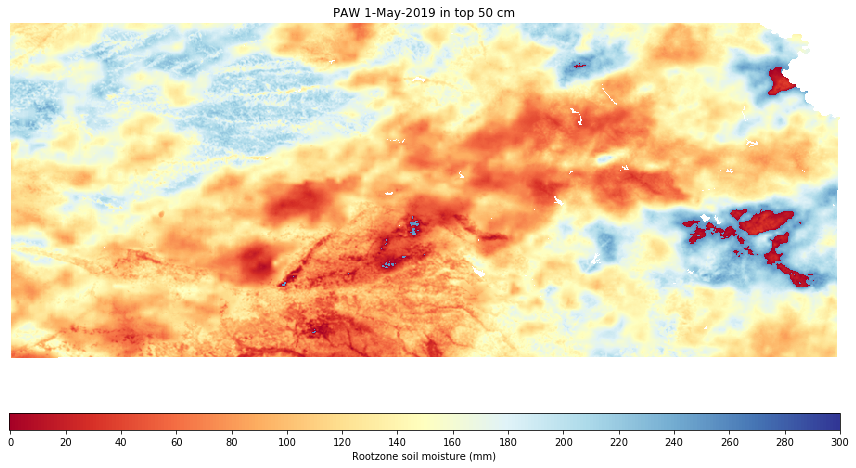

In [9]:
plt.figure(figsize=(12,8))
plt.imshow(dataset_masked[0,:,:], cmap='RdYlBu')
cb = plt.colorbar(ticks=range(0,301,20), 
                  label='Rootzone soil moisture (mm)',
                  orientation="horizontal",
                  pad=0.1,
                  aspect=50)

plt.clim(-0.5, 300)
plt.axis('off')
plt.title('PAW 1-May-2019 in top 50 cm')
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'